<a href="https://colab.research.google.com/github/andreuartigues/Deep-Learning/blob/main/S6_ImageClassification%2BHPTuning%2BRegularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic classification: Classify images of clothing

In [29]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


## Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:

In [30]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [31]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [32]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [33]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [34]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [35]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [36]:
len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

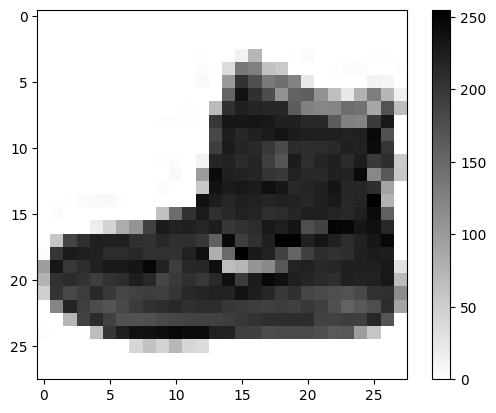

In [37]:
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [38]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

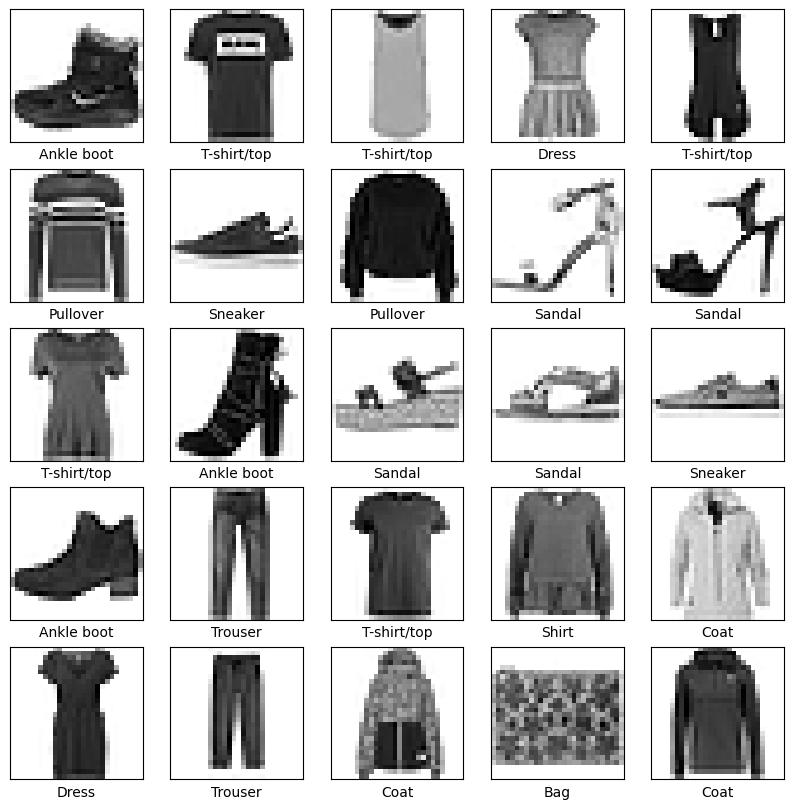

In [39]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [40]:
#TODO 1 (2 layers of 64 hidden nodes, and the first one has dropout 0.2)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64,activation='relu'), #relu for the hidden layer
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64,activation='relu'), #relu for the hidden layer,
    keras.layers.Dense(10,activation="softmax", name="output")
])

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 output (Dense)              (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


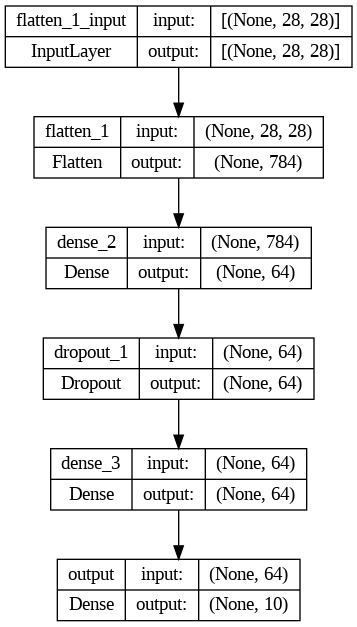

In [42]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


In [46]:
#TODO 2 -- Use Adam
model.compile(optimizer=keras.optimizers.Adam(),loss='sparse_categorical_crossentropy') #Important here to say sparse_lcategorial_crossentropy, not just categorial_crossentropy

In [47]:
#TODO 3 -- Callbacks
import datetime
!rm -rf ./logs/
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir='./logs')
csv_logger = keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5')
callback = keras.callbacks.EarlyStopping(patience=2)

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array. Verify that the predictions match the labels from the `test_labels` array.

To start training,  call the `model.fit` method—so called because it "fits" the model to the training data:

In [48]:
model.fit(train_images, train_labels, epochs=10, validation_split = 0.2,
          callbacks=[callback, tensorboard_callback, csv_logger])

Epoch 1/10
1500/1500 [==============================] - 50s 5ms/step - loss: 0.5962 - val_loss: 0.4221
Epoch 2/10
   6/1500 [..............................] - ETA: 16s - loss: 0.4809

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 7s 4ms/step - loss: 0.4350 - val_loss: 0.3795
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4005 - val_loss: 0.3991
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3790 - val_loss: 0.3756
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3627 - val_loss: 0.3546
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3518 - val_loss: 0.3565
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3412 - val_loss: 0.3479
Epoch 8/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3317 - val_loss: 0.3544
Epoch 9/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3247 - val_loss: 0.3315
Epoch 10/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3208 - val_loss: 0.3302


In [56]:
%tensorboard --logdir

ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
2024-05-17 15:45:48.252539: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-17 15:45:48.252622: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-17 15:45:48.254027: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-17 15:45:49.514814: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC] [--host ADDR]
                   [--bind_all] [--port PORT] [--reuse_port BOOL] [--load_f

In [57]:
!pwd

/content


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.88 (or 88%) on the training data.

## Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [ ]:
train_loss, train_acc = model.evaluate(train_images,  train_labels, verbose=2)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTrain accuracy:', train_acc)
print('\nTest accuracy:', test_acc)

It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting is when a machine learning model performs worse on new, previously unseen inputs than on the training data.

## Hyperparameter tuning using Keras Tuner


In [59]:
pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.6 MB/s eta 0:00:00


In [60]:
import keras_tuner as kt

In [61]:
def model_builder(hp):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

  hp_activation = hp.Choice('activation', values=['relu', 'tanh'])
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  for i in range(hp.Int('num_layers', 2, 3)):
    model.add(tf.keras.layers.Dense(
        units=hp.Int('units_' + str(i),
                     min_value=32, max_value=256, step=100),
                     activation=hp_activation))

  model.add(tf.keras.layers.Dense(10, activation='softmax'))

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])

  return model

In [62]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     directory='dir',
                     project_name='x')

In [63]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [64]:
tuner.search(train_images, train_labels, epochs=10, validation_split=0.2, callbacks=[early_stopping])

Trial 30 Complete [00h 02m 23s]
val_accuracy: 0.8834166526794434

Best val_accuracy So Far: 0.8920000195503235
Total elapsed time: 00h 18m 40s


In [65]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [66]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.4978 - accuracy: 0.8212 - val_loss: 0.3928 - val_accuracy: 0.8558
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3691 - accuracy: 0.8643 - val_loss: 0.3787 - val_accuracy: 0.8658
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3298 - accuracy: 0.8766 - val_loss: 0.3618 - val_accuracy: 0.8662
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3080 - accuracy: 0.8853 - val_loss: 0.3388 - val_accuracy: 0.8761
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2887 - accuracy: 0.8930 - val_loss: 0.3632 - val_accuracy: 0.8655
Epoch 6/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2733 - accuracy: 0.8969 - val_loss: 0.3279 - val_accuracy: 0.8836
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2621 - accuracy: 0.9015 - val_loss: 0.3427 - val_accurac

In [67]:
import pandas as pd

pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.497809,0.821167,0.392815,0.855750
1,0.369092,0.864250,0.378699,0.865750
2,0.329793,0.876646,0.361766,0.866250
3,0.307971,0.885312,0.338836,0.876083
4,0.288705,0.893042,0.363166,0.865500
5,0.273288,0.896896,0.327890,0.883583
6,0.262061,0.901521,0.342679,0.882667
7,0.246563,0.906937,0.328968,0.882250
8,0.237692,0.910667,0.313822,0.890333
9,0.225163,0.914500,0.312876,0.889667


In [68]:
tuner.results_summary()


Results summary
Results in dir/x
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0027 summary
Hyperparameters:
activation: relu
learning_rate: 0.001
num_layers: 2
units_0: 232
units_1: 132
units_2: 232
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.8920000195503235

Trial 0024 summary
Hyperparameters:
activation: relu
learning_rate: 0.001
num_layers: 2
units_0: 132
units_1: 132
units_2: 132
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0020
Score: 0.8899166584014893

Trial 0025 summary
Hyperparameters:
activation: relu
learning_rate: 0.001
num_layers: 3
units_0: 132
units_1: 132
units_2: 232
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0021
Score: 0.8855833411216736

Trial 0016 summary
Hyperparameters:
activation: relu
learning_rate: 0.001
num_layers: 3
units_0: 132
units_1: 232
units_2: 32
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bra